**Data Science and AI for Energy Systems** 

Karlsruhe Institute of Technology

Institute of Automation and Applied Informatics

Summer Term 2024

---

# Exercise IV: Data Analysis

**Imports**

In [318]:
# !pip install emd Install emd if not already done
import emd
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import statsmodels
import statsmodels.tsa.stattools
import seaborn as sns
import matplotlib

## Problem IV.2 (Programming) -- Basic data analysis methods in Python 

#### We consider several basic data analysis methods like calculation of the moments, computation of the autocorrelation, a Fourier analysis and an Empirical Mode Decomposition. In order to understand the concepts of the methods in detail, we apply them to both synthetic data and empirical load time series. In this exercise we consider a synthetic dataset, part of which was already shown in task I.1 (d). The dataset is given as *synthetic\_data\_ex4.csv* in the BW-Sync-and-share folder [https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP](https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP).

***
**(a) Calculate mean, standard deviation, skewness and kurtosis for the  synthetic data set.**


Mean: 0.007965510855993877
Standard deviation: 1.4311237153288874
Skewness: 0.0075581620227117815
Kurtosis excess: -1.4250248746590133
Kurtosis: 1.5749751253409867


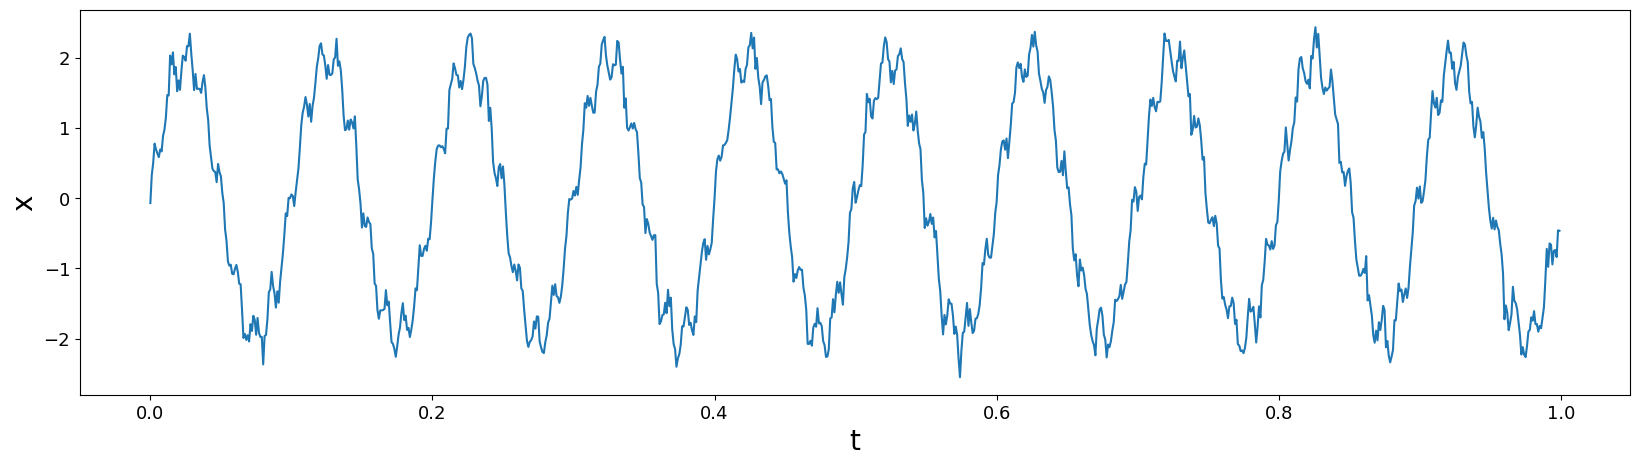

In [319]:
df_syn = pd.read_csv('data/synthetic_data_ex4.csv', index_col=0, names=['Synthetic time series']).squeeze()
df_syn_values = df_syn.values

# In order to interpret our results we plot the synthetic data at first:
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
plt.figure(figsize=(20,5), )
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
df_syn.plot()


'''You can use the following functions:
mean: np.mean
standard deviation: np.std
skewness: sc.stats.skew
kurtosis: sc.stats.kurtosis'''
# Now calculate the mean, standard deviation, skewness and kurtosis of the synthetic data:

mean = np.mean(df_syn)
std = np.std(df_syn.values)
'''
Alternative : std = sc.stats.tstd(df_syn, ddof=0)
'''
skew = sc.stats.skew(df_syn)
kurt_excess = sc.stats.kurtosis(df_syn) 
''' Note that this gives us the "excess kurtosis“, i.e. 𝐾𝑢𝑟𝑡(𝑥) − 3", 
as the kurtosis of a normal distribution is 3.
In order do get the true kurtosis we can set the parameter "fisher" to False:'''
kurt_true = sc.stats.kurtosis(df_syn, fisher=False) 
print('Mean:', mean)
print('Standard deviation:', std)
print('Skewness:', skew)
print('Kurtosis excess:', kurt_excess)
print('Kurtosis:', kurt_true)

***
**(b) Show the probability distribution for the time series (use *seaborn.kdeplot*). Which kind of modality can you observe?**

<Axes: xlabel='Synthetic time series', ylabel='Density'>

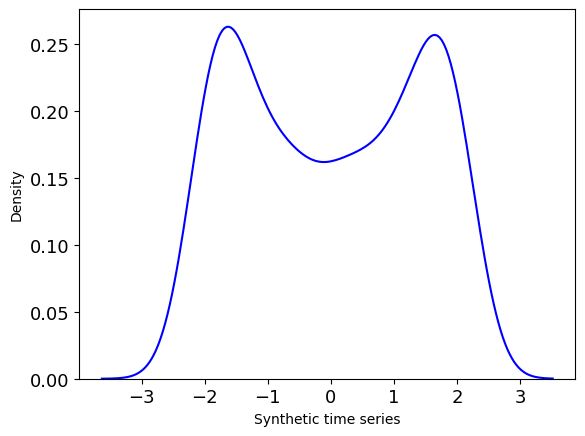

In [320]:
sns.kdeplot(df_syn, color='blue', label='Synthetic data')

We can observe a bimodal distribution.

***
**(c) Calculate the increments of the time series and plot the probability distribution (use again *seaborn.kdeplot*). Which kind of modality can you observe?**

Text(0, 0.5, 'Density')

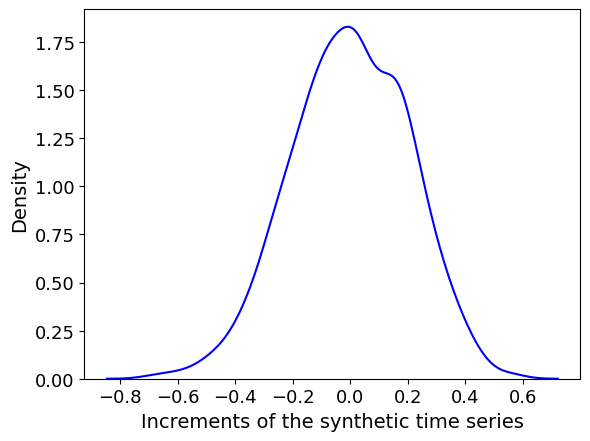

In [321]:
'''Use pd.DataFrame.diff() or np.diff() to calculate the increments of the synthetic data.'''
increments = df_syn.diff()
sns.kdeplot(increments, color='blue', label='Increments of the synthetic time series')
plt.xlabel('Increments of the synthetic time series', fontsize=14)
plt.ylabel('Density', fontsize=14)

We can observe a unimodal distribution, the asymmetry is due to Gaussian noise in the data.

***
**(d) Plot the autocorrelation $\rho_{xx}(\tau)$ for $\tau \in [0,1000]$, you can use the function *acf* from the module *statsmodels.tsa.stattools*, with $nlags = 1000$. Which behaviour can you observe in the autocorrelation?**

Text(0, 0.5, 'Autocorrelation')

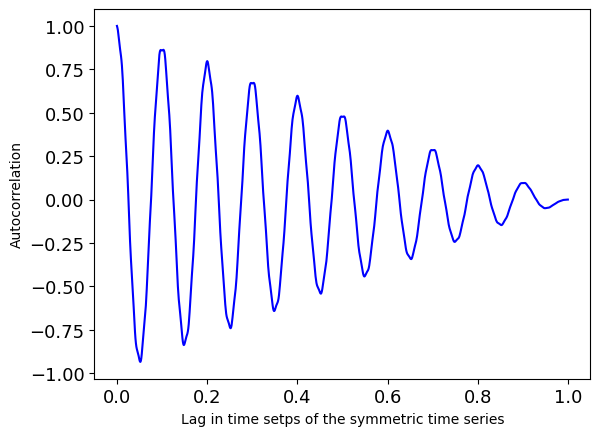

In [322]:
autocor = statsmodels.tsa.stattools.acf(df_syn, nlags=1000)
plt.plot(df_syn.index,autocor, color='blue', label='Autocorrelation of Synthetic Data')
plt.xlabel('Lag in time setps of the symmetric time series')
plt.ylabel('Autocorrelation')

We can observe that the autocorralation of the time series shows the same frequency of oscillations as the time series itself. Note that the oscillations are getting smaller because of the short length of the time series.

***
**(e) We do a Fourier analysis, calculating the Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT)**

(i): Write a formula to calculate the DFT, which is given as $X_k = \sum_{m=0}^{n-1}x_m e^{-2i\pi km/n}$ for discrete measurements $x_0,x_1,\ldots , x_{n-1}$ (for $k = 1,\ldots, n-1$). Calculate the DFT with this formula.

In [323]:
# We write a short function for the DFT:
def discrete_fourier_function(time_series):
    discrete_fourier = []
    for k in range(len(time_series)):
        discrete_fourier.append(np.sum([time_series.values[m]*np.exp(-2j*np.pi*k*m/len(time_series)) for m in range(len(time_series))]))
    return discrete_fourier
# Now we can calculate the DFT of the synthetic data:
discrete_fourier = discrete_fourier_function(df_syn)

(ii) Now use *scipy.fft.fft* and *scipy.fft.fftfreq* to calculate the Fast Fourier Transform.

In [324]:
'''
Use the following example as a guide for (ii) and (iii) below:

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()
'''

'\nUse the following example as a guide for (ii) and (iii) below:\n\n# Number of sample points\nN = 600\n# sample spacing\nT = 1.0 / 800.0\nx = np.linspace(0.0, N*T, N, endpoint=False)\ny = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)\nyf = fft(y)\nxf = fftfreq(N, T)[:N//2]\nplt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))\nplt.grid()\nplt.show()\n'

In [325]:
# The Fast Fourier Transform (FFT) is calculated as follows:
length = len(df_syn)
time_step = df_syn.index.diff()[1] # this value should be 0.001
xf = fftfreq(int(length), time_step)[:length//2]
fast_fourier = fft(df_syn.values)

(iii) Plot the Fourier amplitudes depending on the frequency, using as well the results from (i) as also from (ii). Are the results (almost) identical? What are the main frequencies of the signal?

Text(0, 0.5, 'Amplitude')

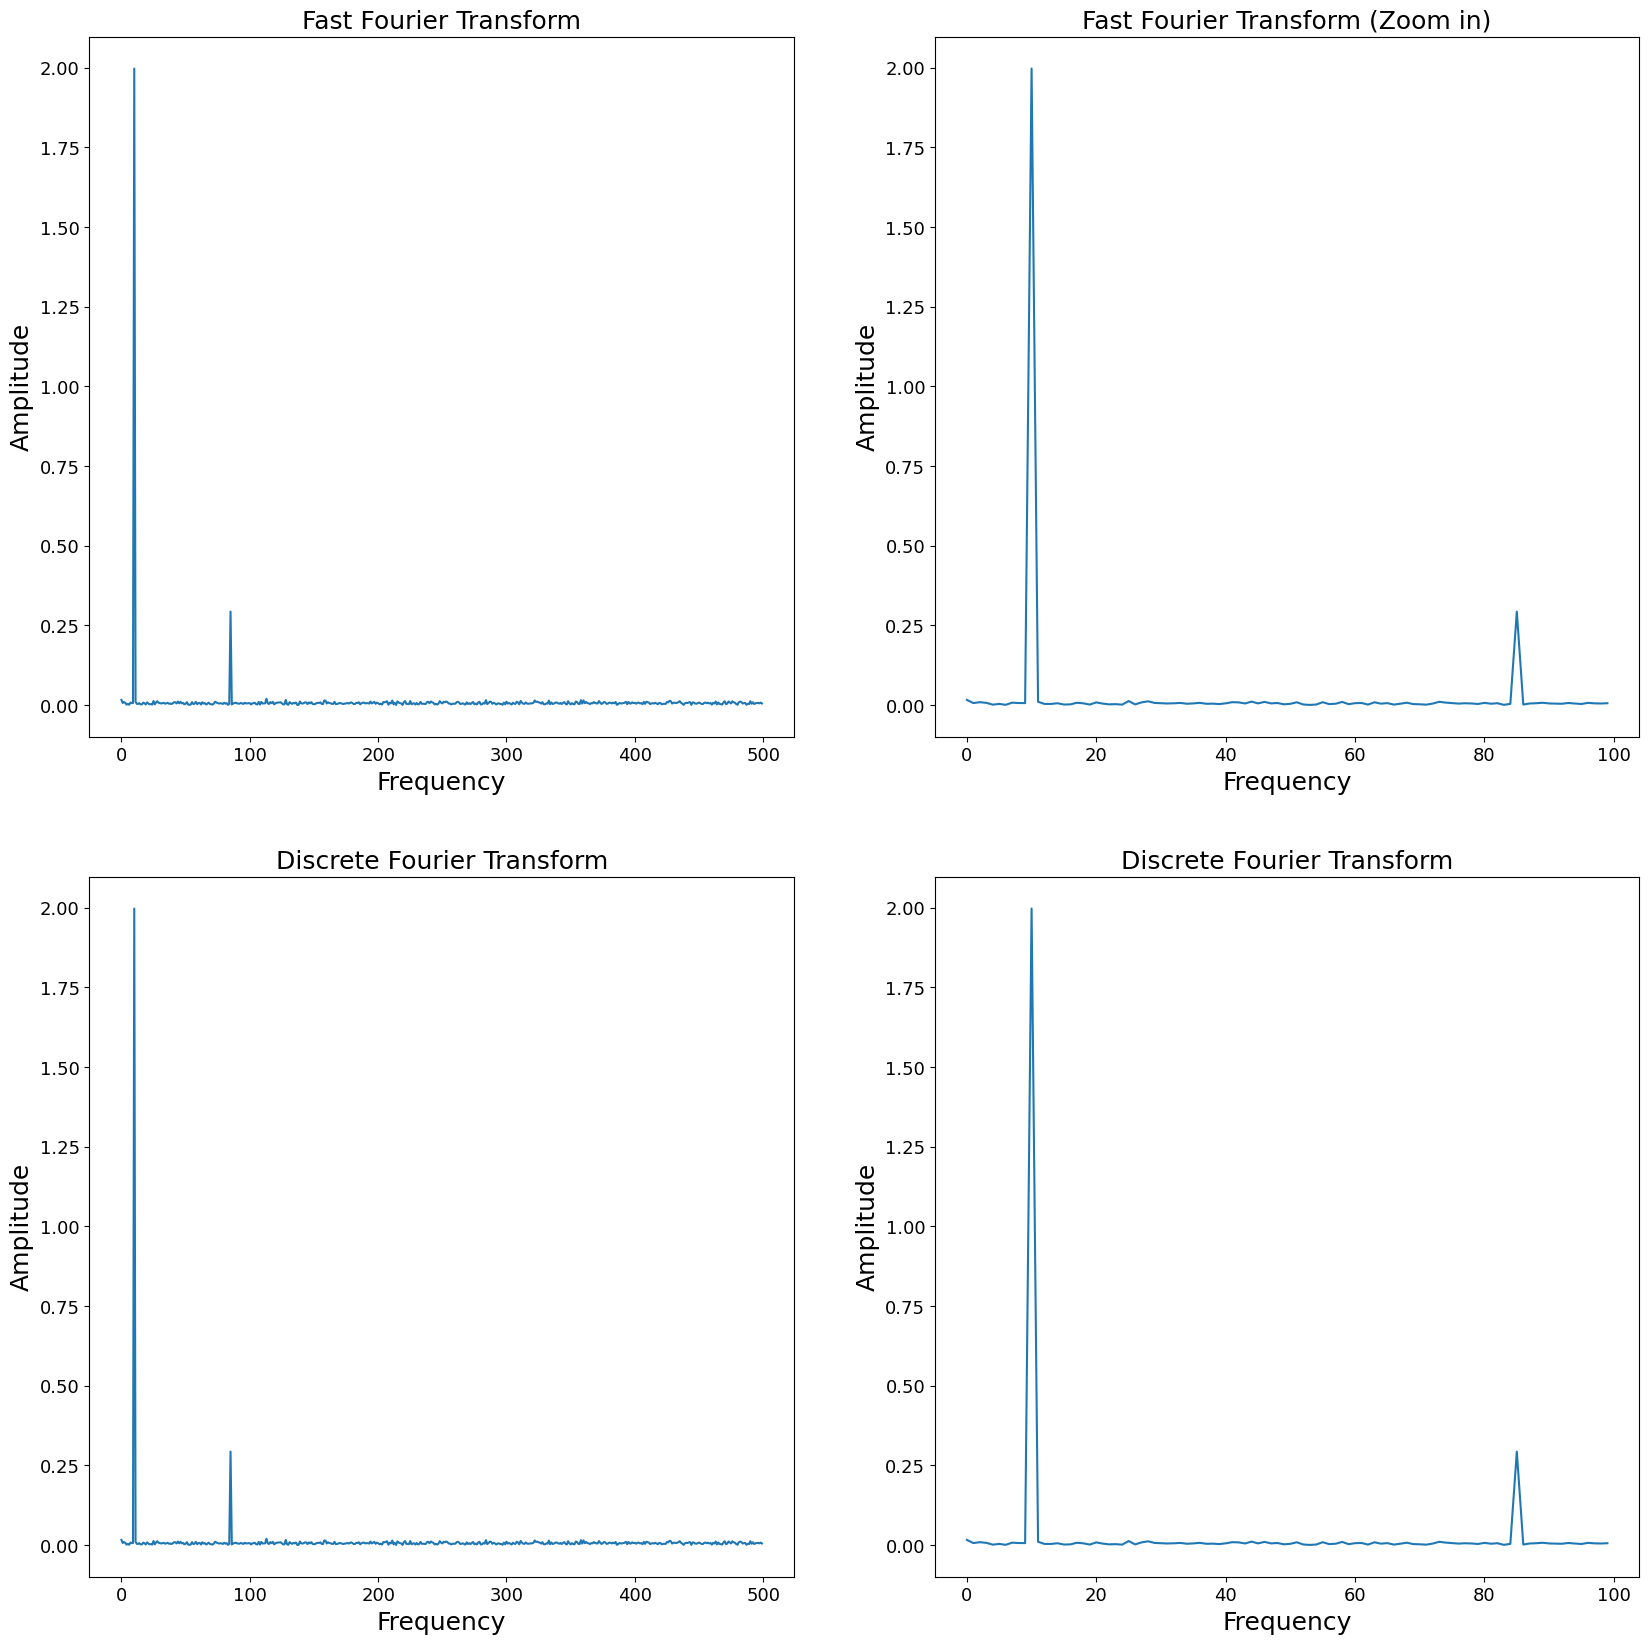

In [326]:
result_fast_fourier = 2.0/length * np.abs(fast_fourier)[0:length//2]
result_discrete_fourier = 2.0/length * np.abs(discrete_fourier)[0:length//2]

fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].plot(xf[:],result_fast_fourier[:])
ax[0,0].set_title('Fast Fourier Transform', fontsize = 18)
ax[0,0].set_xlabel('Frequency', fontsize = 18)
ax[0,0].set_ylabel('Amplitude', fontsize = 18)

ax[0,1].plot(xf[:100],result_fast_fourier[:100]) # For a closer look you can for example only plot the fist 100 values
ax[0,1].set_title('Fast Fourier Transform (Zoom in)', fontsize = 18)
ax[0,1].set_xlabel('Frequency', fontsize = 18)
ax[0,1].set_ylabel('Amplitude', fontsize = 18)

ax[1,0].plot(xf[:],result_discrete_fourier[:]) 
ax[1,0].set_title('Discrete Fourier Transform', fontsize = 18)
ax[1,0].set_xlabel('Frequency', fontsize = 18)
ax[1,0].set_ylabel('Amplitude', fontsize = 18)

ax[1,1].plot(xf[:100],result_discrete_fourier[:100]) # For a closer look you can for example only plot the fist 100 values
ax[1,1].set_title('Discrete Fourier Transform', fontsize = 18)
ax[1,1].set_xlabel('Frequency', fontsize = 18)
ax[1,1].set_ylabel('Amplitude', fontsize = 18)


We see that we get (almost) identical results for the Discrete Fourier Transforms that were calculated with out function and for the Fast Fourier Transforms. The main frequencies of the signal seem to be  approximately 10 and 85.

***
**(f) Finally we carry out an Empirical Mode Decomposition: For extracting the Intrinsic Mode Functions (IMFs) of the signal, use the function *emd.sift.sift*. You can plot the IMFs with *emd.plotting.plot\_imfs*. <br>How many mode functions are extracted, and which mode functions are relevant for the long-time oscillations, short-time oscillations and noise?**

<Axes: xlabel='Time (samples)'>

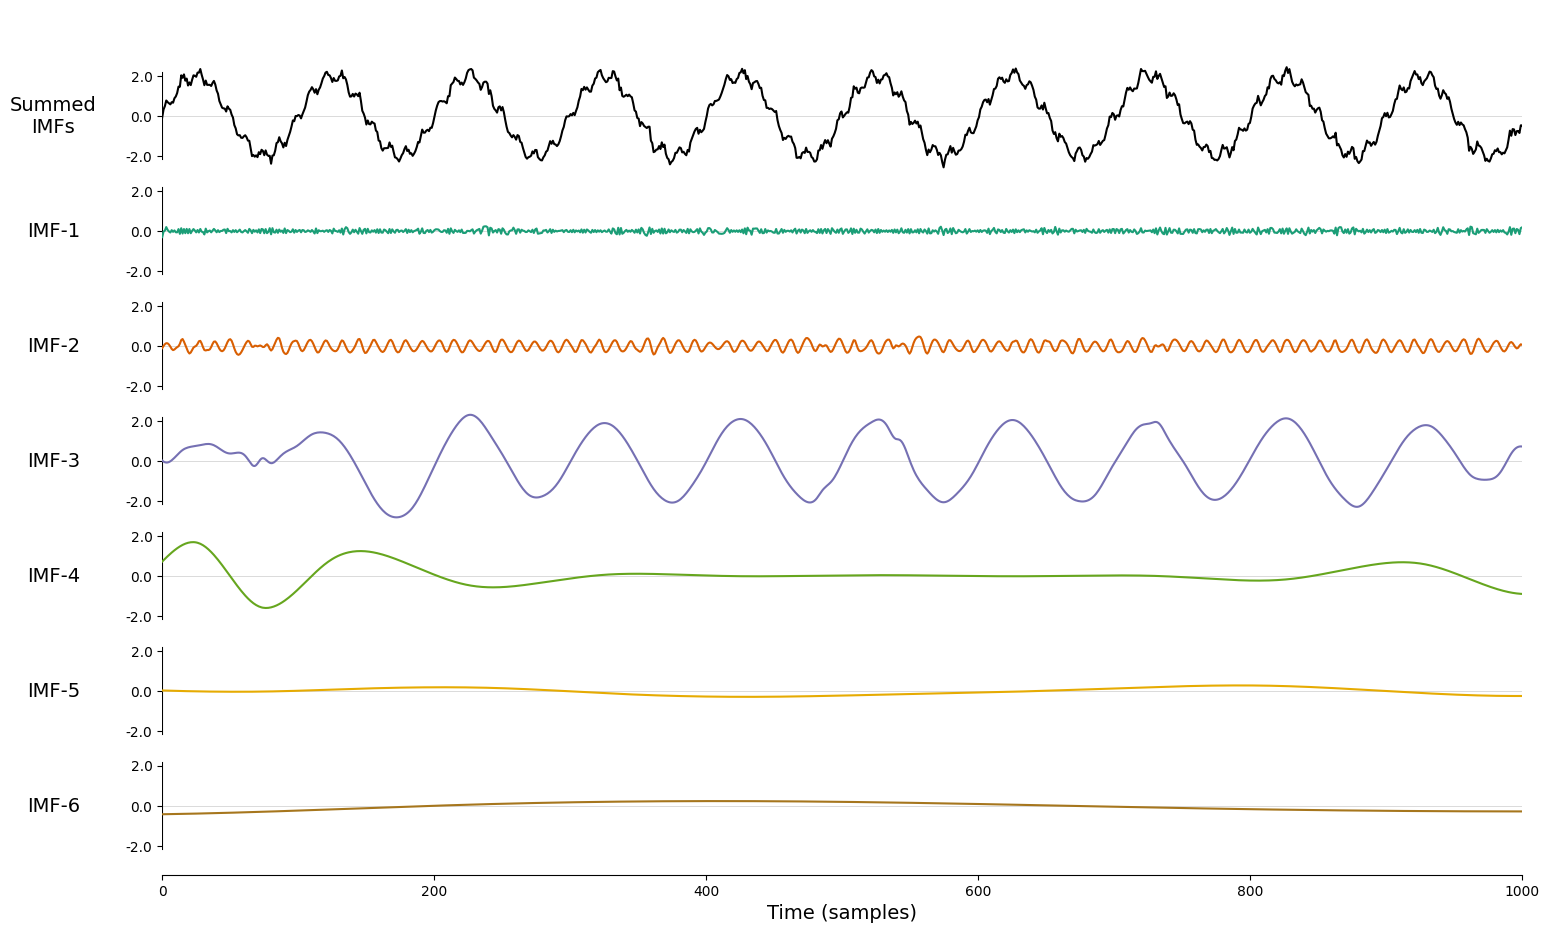

In [327]:
imf_synthetic_data = emd.sift.sift(df_syn_values)
emd.plotting.plot_imfs(imf_synthetic_data)

We extract 6 intrisic mode functions. IMF 1 seems to contain the noise of the signal while IMFs 2 and 3 show some oscillations with different frequency. In the IMFs 4,5 and 6, we receive a mostly flat signal.  

***
## Problem IV.3 (Programming) -- Basic data analysis methods for  a load time series

#### As we now saw some basic data analysis concepts applied on a synthetic dataset, we want to apply the same methods to an empirical time series which shows several months of energy demand of an industrial building, with a time resolution of $15$ minutes. The empirical dataset is given as *empirical\_load\_data\_ex4.csv* in the BW-Sync-and-share folder [https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP](https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP).

Note that the load that we consider here represents the energy imported from the public grid in a industrial building which is part of a research institute, the dataset is taken from [https://data.open-power-system-data.org/household_data/2020-04-15](https://data.open-power-system-data.org/household_data/2020-04-15), i.e. we use the dataset *DE_KN_industrial3_grid_import*.

***
**(a) Calculate the mean, standard deviation, skewness and kurtosis for the load time series.**

Mean: 19.776585393772894
Standard deviation: 8.352038672511394
Skewness: 1.3240993405584232
Kurtosis excess: 0.621305005053701
Kurtosis: 3.621305005053701


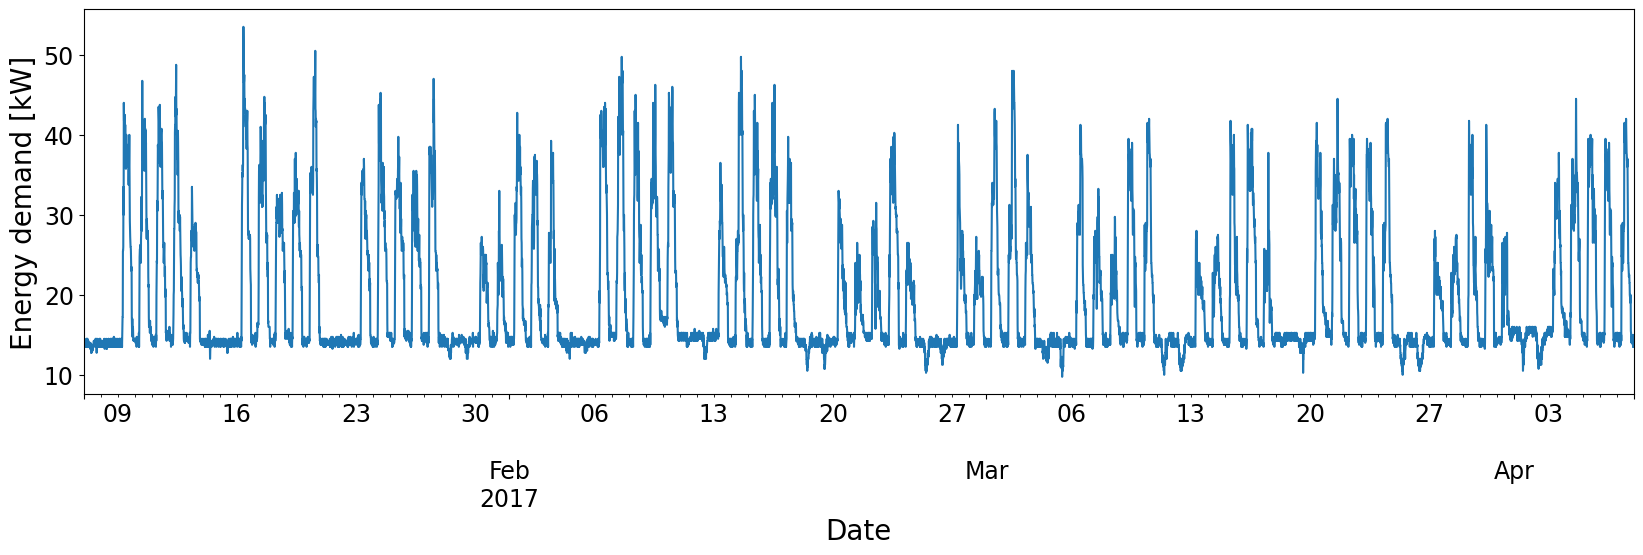

In [328]:
df_load = pd.read_csv('data/empirical_data_ex4.csv', parse_dates=True, index_col=0, names=['Empirical load time series']).squeeze()
df_load_values = df_load.values

# In order to interpret our results we plot the synthetic data at first:
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 
plt.figure(figsize=(20,5), )
plt.ylabel('Energy demand [kW]', fontsize=20)
plt.xlabel('Date', fontsize=20)
df_load.plot()


'''You can use the following functions:
mean: np.mean
standard deviation: np.std
skewness: sc.stats.skew
kurtosis: sc.stats.kurtosis'''
# Now calculate the mean, standard deviation, skewness and kurtosis of the synthetic data:

mean = np.mean(df_load)
std = np.std(df_load.values)
'''
Alternative : std = sc.stats.tstd(df_load, ddof=0)
'''
skew = sc.stats.skew(df_load)
kurt_excess = sc.stats.kurtosis(df_load) 
''' Note that this gives us the "excess kurtosis“, i.e. 𝐾𝑢𝑟𝑡(𝑥) − 3", 
as the kurtosis of a normal distribution is 3.
In order do get the true kurtosis we can set the parameter "fisher" to False:'''
kurt_true = sc.stats.kurtosis(df_load, fisher=False) 
print('Mean:', mean)
print('Standard deviation:', std)
print('Skewness:', skew)
print('Kurtosis excess:', kurt_excess)
print('Kurtosis:', kurt_true)

***
**(b) Show the probability distribution for the time series (use *seaborn.kdeplot*). In especially, plot the results with different smoothing parameters *bw\_adjust* $\in \{0.1,0.5,1\}$ and plot also the histogram using *plt.hist* with $50$ bins.**

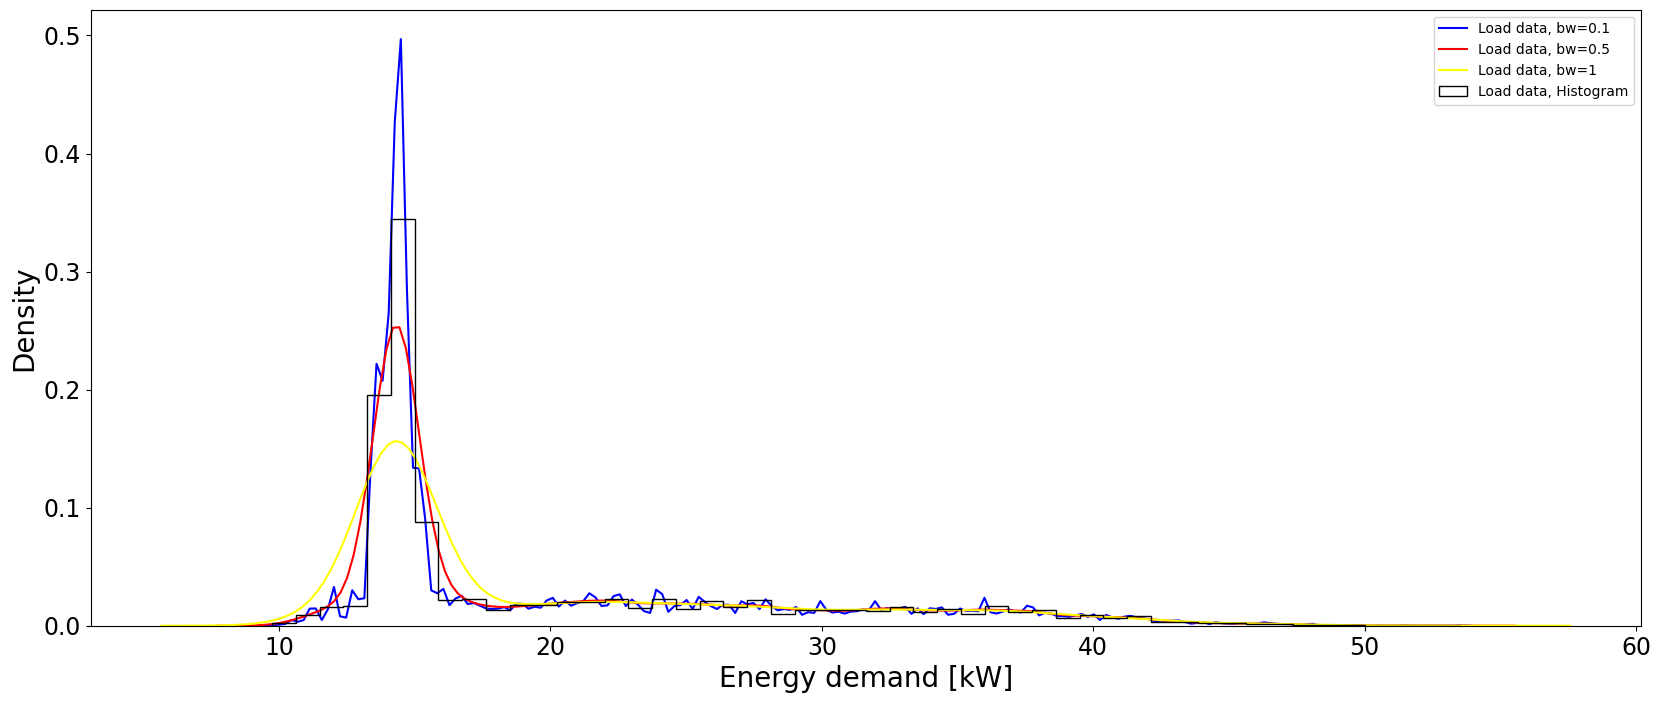

In [329]:
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 
plt.figure(figsize=(20,8))
sns.kdeplot(df_load, color='blue', bw_adjust=0.1, label='Load data, bw=0.1')
sns.kdeplot(df_load, color='red', bw_adjust=0.5, label='Load data, bw=0.5')
sns.kdeplot(df_load, color='yellow', bw_adjust=1, label='Load data, bw=1')
# Note that the parameter bw_adjust changes the bandwidth of the kernel density estimation, which can be used to smooth the density estimate.

plt.hist(df_load,bins=50, color = 'black', label='Load data, Histogram', density = True, histtype='step')
plt.xlabel('Energy demand [kW]', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend()


***
**(c) Calculate the increments of the time series and plot the probability distribution (use again *seaborn.kdeplot*).**


Text(0, 0.5, 'Density')

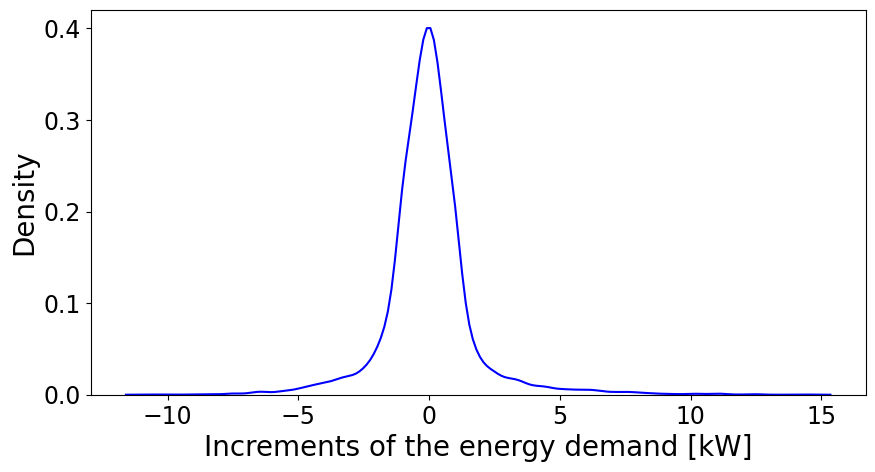

In [330]:
'''Use pd.DataFrame.diff() or np.diff() to calculate the increments of the empirical load data.'''
plt.figure(figsize=(10,5))
increments = df_load.diff()
sns.kdeplot(increments, color='blue', label='Time Series Increments')
plt.xlabel('Increments of the energy demand [kW]', fontsize=20)
plt.ylabel('Density', fontsize=20)

***
**(d) Plot the autocorrelation $\rho_{xx}(\tau)$ for $\tau \in [0,24*4*10]$ (10 days). Which behaviour can you observe in the autocorrelation?**

Text(0, 0.5, 'Autocorrelation')

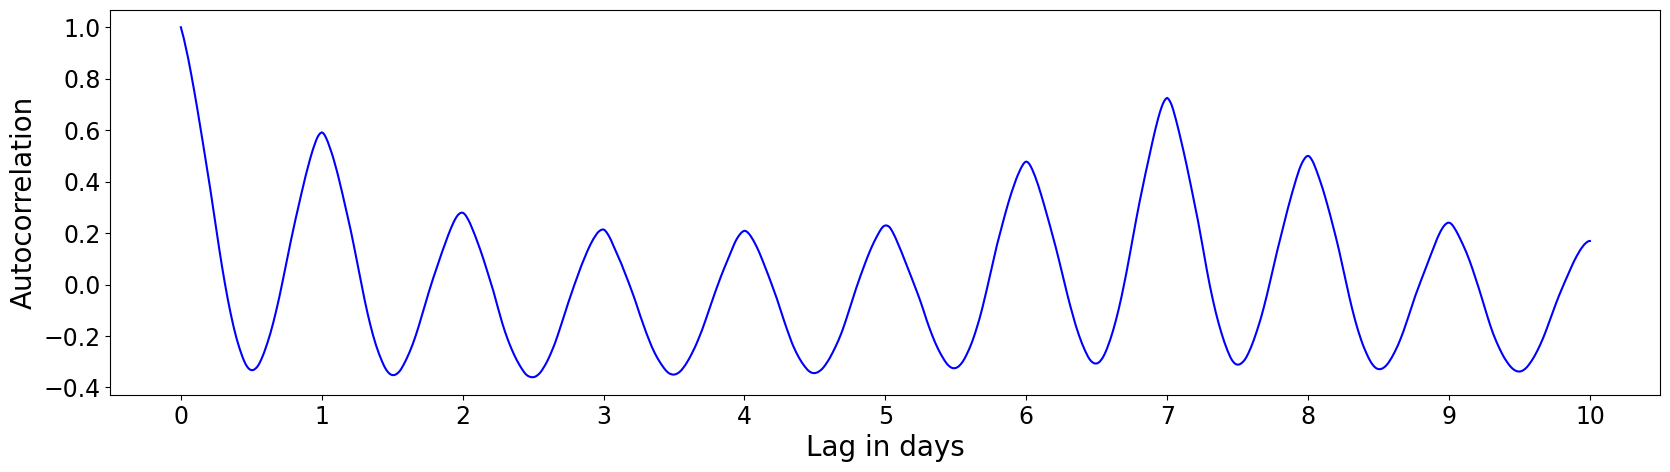

In [331]:
autocor = statsmodels.tsa.stattools.acf(df_load, nlags=24*4*10)
plt.figure(figsize = (20,5))
plt.plot(autocor, color='blue', label='Autocorrelation of Load Data')
plt.xticks(np.arange(0, 24*4*10+1, 24*4), labels = (np.arange(0, 24*4*10+1, 24*4)/96).astype('int'))
plt.xlabel('Lag in days', fontsize = 20)
plt.ylabel('Autocorrelation', fontsize = 20)

We see a peridicity in the autocorrelation with peaks at lags of full days, with a higher peak after a week. This is consistent with the observations of the regularities of the time series.

***
**(e) We do a Fourier analysis calculating the Fast Fourier Transform: Use *scipy.fft.fft* and *scipy.fft.fftfreq* to calculate the Fast Fourier Transform. Plot the Fourier amplitudes depending on the frequency. What are main frequencies of the signal?**

Text(0.5, 1.0, 'Fourier Analysis using Fast Fourier Transform for load data (Zoom in)')

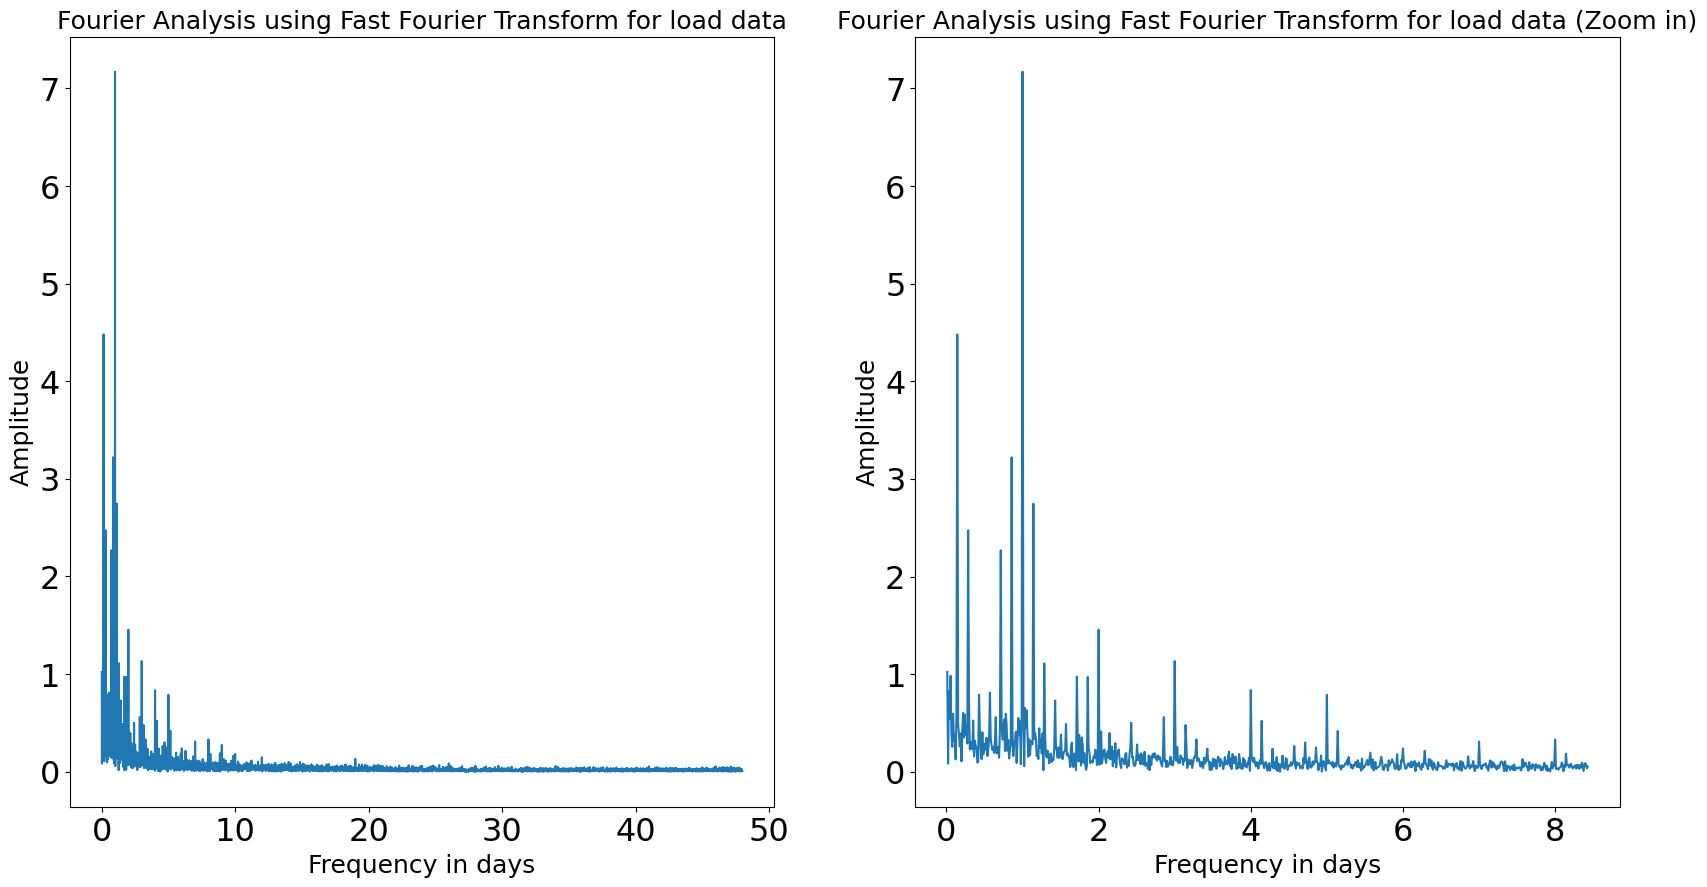

In [332]:
# The Fast Fourier Transform (FFT) is calculated as follows:
length = len(df_load)
time_step = 15/(4*15*24) # we use that time step to get the frequency with respect to number of days (remember that the time resoltion is 15 minutes)
fast_fourier = fft(df_load_values)
xf = fftfreq(int(length), time_step)[:length//2]

result_fast_fourier = 2.0/length * np.abs(fast_fourier)[0:length//2]


matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].plot(xf[1:],result_fast_fourier[1:]) #
'''Note that we leave out result_fast_fourier[0], 
as this is just calculated as two times the mean of the time series:
df_load.sum()/(len(df_load))*2 = result_fast_fourier[0]. (see the formula of the DFTs)
This doesn't provide us information about the frequencies, hence we leave that value out here.
'''

ax[0].set_xlabel('Frequency in days', fontsize = 18)
ax[0].set_ylabel('Amplitude', fontsize = 18)
ax[0].set_title('Fourier Analysis using Fast Fourier Transform for load data', fontsize = 18)

ax[1].plot(xf[1:24*4*8],result_fast_fourier[1:24*4*8]) #
ax[1].set_xlabel('Frequency in days', fontsize = 18)
ax[1].set_ylabel('Amplitude', fontsize = 18)
ax[1].set_title('Fourier Analysis using Fast Fourier Transform for load data (Zoom in)', fontsize=18)

We receive several peaks for frequencies of less than two days. Further we observe some regular peaks of the amplitude for frequencies of full days, which also corresponds to the peaks of the autocorrelation.

***
**(f) As for the synthetic time series in Exercise IV.2, we carry out an Empirical Mode Decomposition: <br>Use the function *emd.sift.sift* for extracting the Intrinsic Mode Functions (IMFs) of the load signal. You can plot the IMFs with *emd.plotting.plot\_imfs*. How many mode functions are extracted, and do the modes provide information about the oscillations and trends that determine the time series?**

<Axes: xlabel='Time (samples)'>

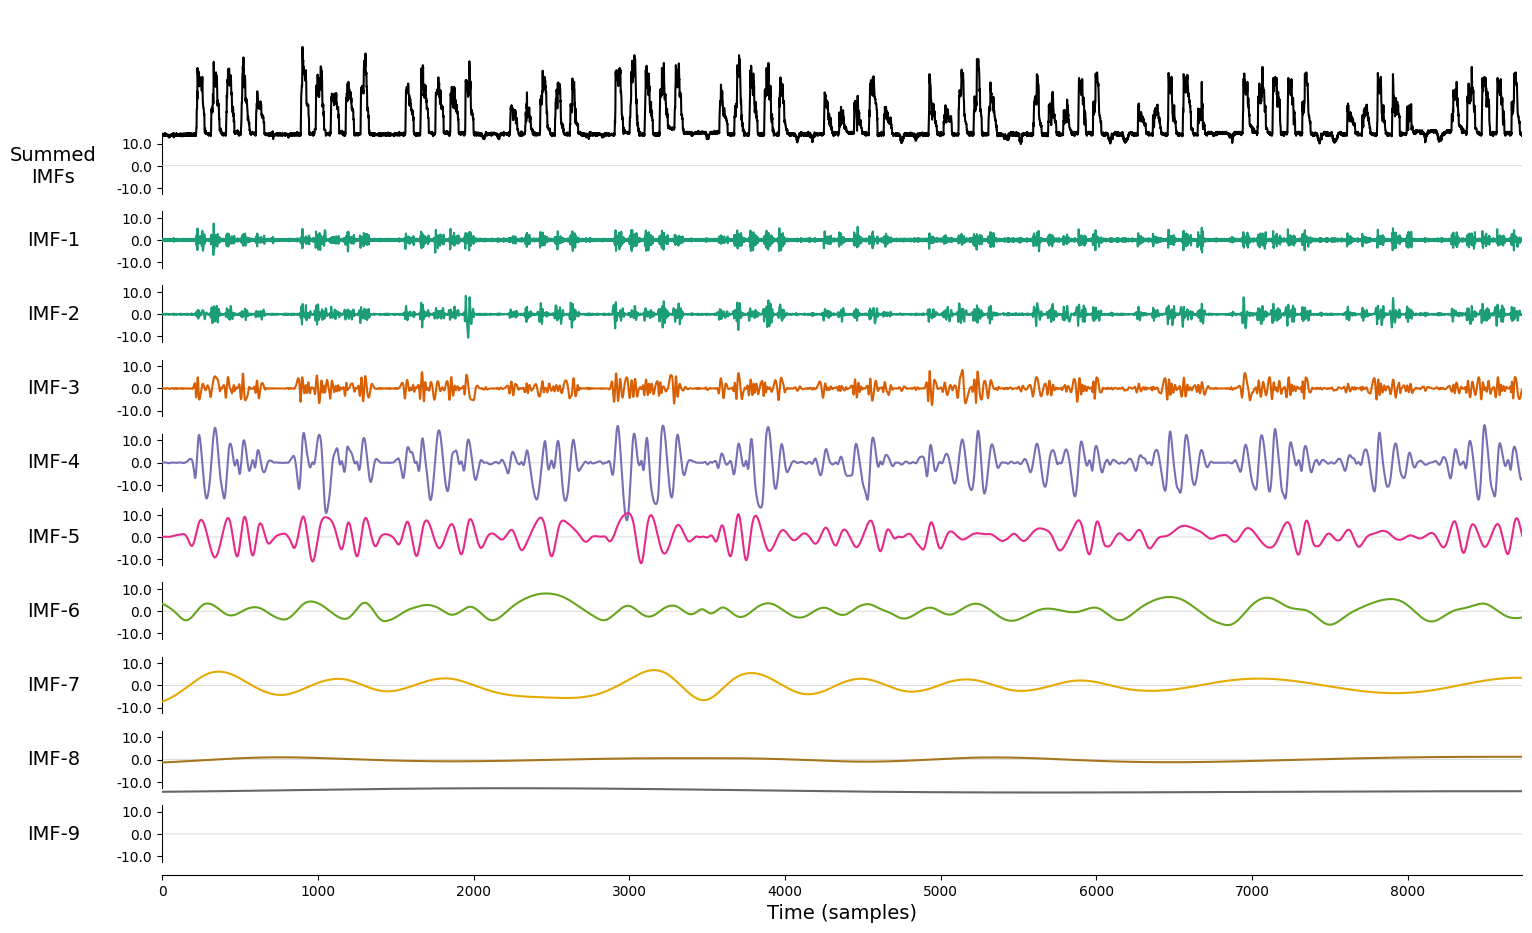

In [333]:
imf_load_data = emd.sift.sift(df_load_values)
emd.plotting.plot_imfs(imf_load_data)

9 IMFs are extracted. The largest oscillations and deviations can be found in the IMFs 4,5 and 6, while smaller deviations can be seen in the IMFs 1,2 and 3. Especially in the first 4 IMFs we clearly see differences between the days during the week and the weekends. <br>
Note that the Empirical Mode Decomplosition (EMD) for the empirical load time series is logically harder to interpret than the EMD for the synthetic dataset, as we observe a lot more different influences and dynamics which can partly be summarized as "noise".

### Addition for Exercise IV.2: The synthetic dataset is created as follows:

In [334]:
time=np.linspace(0,1,1000, endpoint=False)
cleanData = 2*np.sin(time*10*2*np.pi) + 0.3*np.sin(time*85*2*np.pi) 
#add Gaussian noise
noiseProcess = sc.stats.norm(loc = 0, scale = 0.1).rvs(size=len(time))
synthetic_data=cleanData+noiseProcess

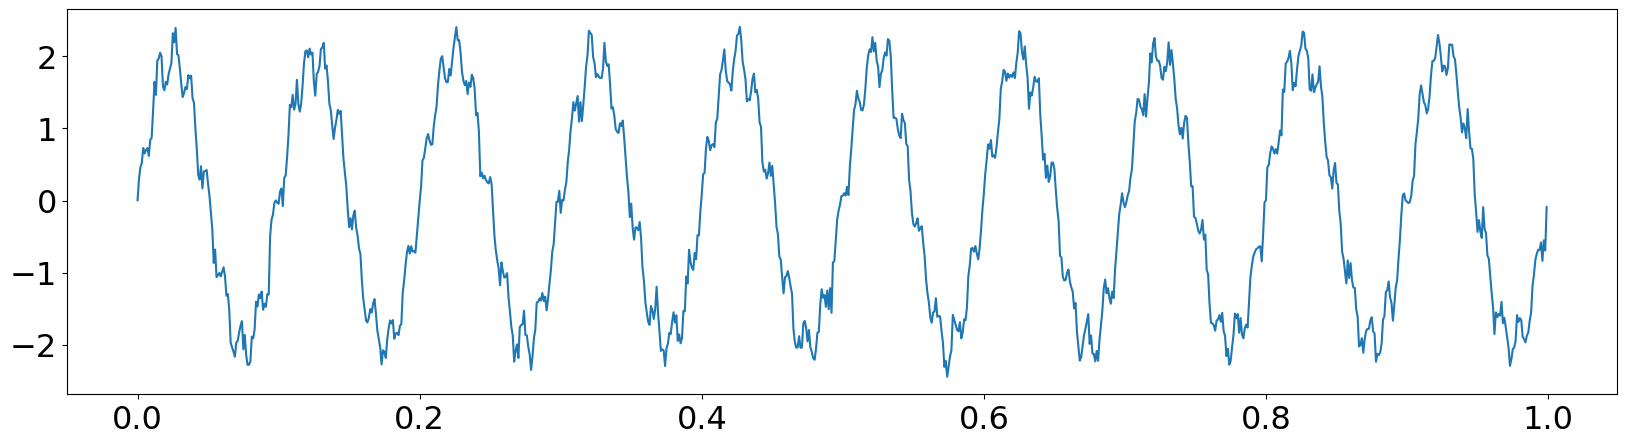

In [337]:

plt.figure(figsize = (20,5))
plt.plot(time,synthetic_data)

You can change the dataset and analyze the data for different parameters.